# Identificación de textos de acuerdo a su área científica, física, biología o química.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga del conjunto de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train=pd.read_csv('/content/drive/MyDrive/Datos/dataset/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Datos/dataset/test.csv')

In [4]:
train["Topic"] = train["Topic"].replace({"Biology": "Biología", "Physics": "Física", "Chemistry": "Química" })

In [5]:
test["Topic"] = test["Topic"].replace({"Biology": "Biología", "Physics": "Física", "Chemistry": "Química" })

In [6]:
train_comments = train[['Comment']]
train_topic = train[['Topic']]

test_comments = test[['Comment']]
test_topic = test[['Topic']]

# Visualizacion del conjunto de entrenamiento y prueba

In [7]:
print(train_comments.shape)
print(train_topic.shape)

print(test_comments.shape)
print(test_topic.shape)

(8695, 1)
(8695, 1)
(1586, 1)
(1586, 1)


In [8]:
print(train_comments['Comment'][1])
print(train_topic['Topic'][1])

Is it so hard to believe that there exist particulars out that that we can't detect with anything we've invented so far.\n\nI mean look how long it took humans to find out a way to detect radiation.
Física


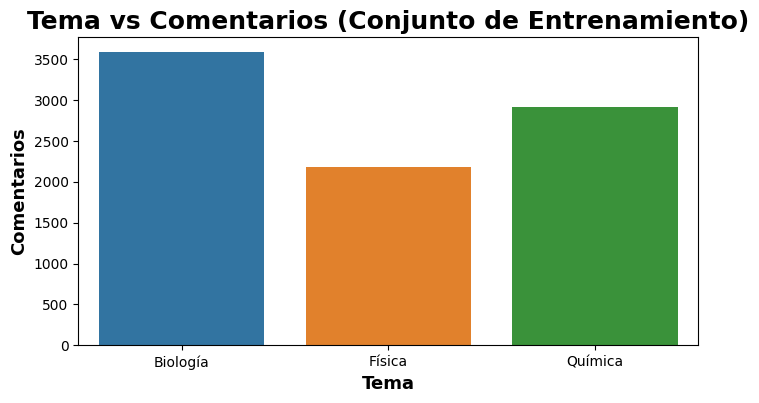

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x = train_topic['Topic'])
plt.title("Tema vs Comentarios (Conjunto de Entrenamiento)",fontsize = 18,fontweight = 'bold')
plt.xlabel("Tema",fontsize = 13,fontweight = 'bold')
plt.ylabel("Comentarios",fontsize=13,fontweight = 'bold')
plt.show()

Para el conjunto de entrenamiento, tenemos:
*   41.3% de comentarios para Biologia
*   25.1% de comentarios para Fisica
*   33.6% de comentarios para Quimica

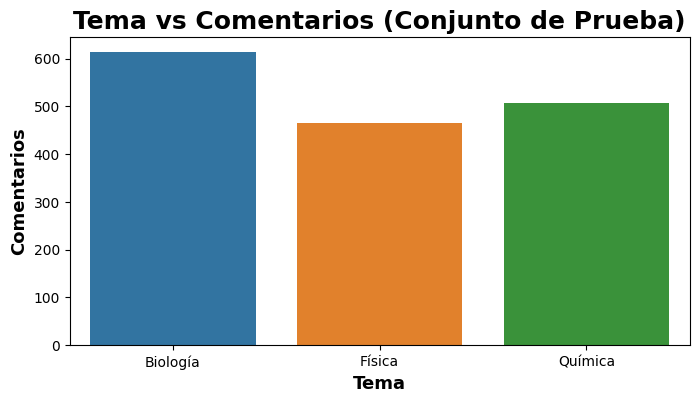

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(x = test_topic['Topic'])
plt.title("Tema vs Comentarios (Conjunto de Prueba)",fontsize = 18,fontweight = 'bold')
plt.xlabel("Tema",fontsize = 13,fontweight = 'bold')
plt.ylabel("Comentarios",fontsize=13,fontweight = 'bold')
plt.show()

Para el conjunto de prueba, tenemos:
*   38.7% de comentarios para Biologia
*   29.4% de comentarios para Fisica
*   31.9% de comentarios para Quimica

# Preprocesamiento de datos

Eliminamos los emojis de los comentarios

In [11]:
import re

def EliminarEmoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [12]:
train_comments = train_comments.assign(Sin_Emoji = train_comments['Comment'].apply(lambda x: EliminarEmoji(x)) )

In [13]:
train_comments

,Comment,Sin_Emoji
0,A few things. You might have negative- frequen...,A few things. You might have negative- frequen...
1,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...
2,There are bees,There are bees
3,I'm a medication technician. And that's alot o...,I'm a medication technician. And that's alot o...
4,Cesium is such a pretty metal.,Cesium is such a pretty metal.
...,...,...
8690,I make similar observations over the last week...,I make similar observations over the last week...
8691,You would know.,You would know.
8692,Also use the correct number of sig figs,Also use the correct number of sig figs
8693,"What about the ethical delimmas, groundbreaki...","What about the ethical delimmas, groundbreaki..."


In [14]:
print("Con emoji:",train_comments['Comment'][12])
print("Sin emoji:",train_comments['Sin_Emoji'][12])

Con emoji: He's probably just really torn up about the Dragonfly. 😄
Sin emoji: He's probably just really torn up about the Dragonfly. 


Eliminacion de atributos HTML

In [15]:
def Eliminar_atributo_html(text):
    html_pattern = re.compile(r'https?://\S+|www\.\S+')
    return html_pattern.sub(r'', text)

In [16]:
train_comments['Sin_atributos_HTML'] = train_comments['Sin_Emoji'].apply(lambda x: Eliminar_atributo_html(x))

In [17]:
train_comments

,Comment,Sin_Emoji,Sin_atributos_HTML
0,A few things. You might have negative- frequen...,A few things. You might have negative- frequen...,A few things. You might have negative- frequen...
1,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...
2,There are bees,There are bees,There are bees
3,I'm a medication technician. And that's alot o...,I'm a medication technician. And that's alot o...,I'm a medication technician. And that's alot o...
4,Cesium is such a pretty metal.,Cesium is such a pretty metal.,Cesium is such a pretty metal.
...,...,...,...
8690,I make similar observations over the last week...,I make similar observations over the last week...,I make similar observations over the last week...
8691,You would know.,You would know.,You would know.
8692,Also use the correct number of sig figs,Also use the correct number of sig figs,Also use the correct number of sig figs
8693,"What about the ethical delimmas, groundbreaki...","What about the ethical delimmas, groundbreaki...","What about the ethical delimmas, groundbreaki..."


In [18]:
print("Comentarios: \n1 ", train_comments['Comment'][8], "\n2", train_comments['Comment'][55], "\n3",train_comments['Comment'][117])
print("\nSin atributos HTML: \n1 ", train_comments['Sin_atributos_HTML'][8], "\n2", train_comments['Sin_atributos_HTML'][55], "\n3",train_comments['Sin_atributos_HTML'][117])

Comentarios: 
1  https://t.me/joinchat/3gElLHLuMCxhNGI0 
2 [This may come in handy](https://libgen.is/search.php?req=Critical+Survey+of+Stability+Constants+of+EDTA+Complexes&lg_topic=libgen&open=0&view=simple&res=25&phrase=1&column=def) 
3 Here u go  \n\n\nhttps://www.khanacademy.org/science/physics/linear-momentum/elastic-and-inelastic-collisions/a/what-are-elastic-and-inelastic-collisions#:\~:text=An%20elastic%20collision%20is%20a,conserved%20quantities%20in%20elastic%20collisions.&text=This%20collision%20is%20perfectly%20elastic%20because%20no%20energy%20has%20been%20lost.

Sin atributos HTML: 
1   
2 [This may come in handy]( 
3 Here u go  \n\n\n


Eliminación de signos de puntuación

In [19]:
import string

In [20]:
def Eliminar_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [21]:
train_comments["Sin_signos_de_puntuacion"] = train_comments["Sin_atributos_HTML"].apply(lambda text: Eliminar_punctuation(text))

In [22]:
train_comments

,Comment,Sin_Emoji,Sin_atributos_HTML,Sin_signos_de_puntuacion
0,A few things. You might have negative- frequen...,A few things. You might have negative- frequen...,A few things. You might have negative- frequen...,A few things You might have negative frequency...
1,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...
2,There are bees,There are bees,There are bees,There are bees
3,I'm a medication technician. And that's alot o...,I'm a medication technician. And that's alot o...,I'm a medication technician. And that's alot o...,Im a medication technician And thats alot of d...
4,Cesium is such a pretty metal.,Cesium is such a pretty metal.,Cesium is such a pretty metal.,Cesium is such a pretty metal
...,...,...,...,...
8690,I make similar observations over the last week...,I make similar observations over the last week...,I make similar observations over the last week...,I make similar observations over the last week...
8691,You would know.,You would know.,You would know.,You would know
8692,Also use the correct number of sig figs,Also use the correct number of sig figs,Also use the correct number of sig figs,Also use the correct number of sig figs
8693,"What about the ethical delimmas, groundbreaki...","What about the ethical delimmas, groundbreaki...","What about the ethical delimmas, groundbreaki...",What about the ethical delimmas groundbreakin...


In [23]:
print("Comentarios: \n ", train_comments['Comment'][1])
print("\nSin signos de puntuacion HTML: \n ", train_comments['Sin_signos_de_puntuacion'][1])

Comentarios: 
  Is it so hard to believe that there exist particulars out that that we can't detect with anything we've invented so far.\n\nI mean look how long it took humans to find out a way to detect radiation.

Sin signos de puntuacion HTML: 
  Is it so hard to believe that there exist particulars out that that we cant detect with anything weve invented so farnnI mean look how long it took humans to find out a way to detect radiation


Comentarios solo con minuscula

In [24]:
train_comments["Con_minusculas"] = train_comments["Sin_signos_de_puntuacion"].str.lower()

In [25]:
train_comments

,Comment,Sin_Emoji,Sin_atributos_HTML,Sin_signos_de_puntuacion,Con_minusculas
0,A few things. You might have negative- frequen...,A few things. You might have negative- frequen...,A few things. You might have negative- frequen...,A few things You might have negative frequency...,a few things you might have negative frequency...
1,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,is it so hard to believe that there exist part...
2,There are bees,There are bees,There are bees,There are bees,there are bees
3,I'm a medication technician. And that's alot o...,I'm a medication technician. And that's alot o...,I'm a medication technician. And that's alot o...,Im a medication technician And thats alot of d...,im a medication technician and thats alot of d...
4,Cesium is such a pretty metal.,Cesium is such a pretty metal.,Cesium is such a pretty metal.,Cesium is such a pretty metal,cesium is such a pretty metal
...,...,...,...,...,...
8690,I make similar observations over the last week...,I make similar observations over the last week...,I make similar observations over the last week...,I make similar observations over the last week...,i make similar observations over the last week...
8691,You would know.,You would know.,You would know.,You would know,you would know
8692,Also use the correct number of sig figs,Also use the correct number of sig figs,Also use the correct number of sig figs,Also use the correct number of sig figs,also use the correct number of sig figs
8693,"What about the ethical delimmas, groundbreaki...","What about the ethical delimmas, groundbreaki...","What about the ethical delimmas, groundbreaki...",What about the ethical delimmas groundbreakin...,what about the ethical delimmas groundbreakin...


Test comments

Se hace lo mismo para los comentarios de prueba

In [26]:
test_comments = test_comments.assign(Sin_Emoji = test_comments['Comment'].apply(lambda x: EliminarEmoji(x)) )

In [27]:
test_comments['Sin_atributos_HTML'] = test_comments['Sin_Emoji'].apply(lambda x: Eliminar_atributo_html(x))
test_comments["Sin_signos_de_puntuacion"] = test_comments["Sin_atributos_HTML"].apply(lambda text: Eliminar_punctuation(text))
test_comments["Con_minusculas"] = test_comments["Sin_signos_de_puntuacion"].str.lower()

In [28]:
test_comments

,Comment,Sin_Emoji,Sin_atributos_HTML,Sin_signos_de_puntuacion,Con_minusculas
0,Personally I have no idea what my IQ is. I’ve ...,Personally I have no idea what my IQ is. I’ve ...,Personally I have no idea what my IQ is. I’ve ...,Personally I have no idea what my IQ is I’ve n...,personally i have no idea what my iq is i’ve n...
1,I'm skeptical. A heavier lid would be needed t...,I'm skeptical. A heavier lid would be needed t...,I'm skeptical. A heavier lid would be needed t...,Im skeptical A heavier lid would be needed to ...,im skeptical a heavier lid would be needed to ...
2,I think I have 100 cm of books on the subject....,I think I have 100 cm of books on the subject....,I think I have 100 cm of books on the subject....,I think I have 100 cm of books on the subject ...,i think i have 100 cm of books on the subject ...
3,Is chemistry hard in uni. Ive read somewhere t...,Is chemistry hard in uni. Ive read somewhere t...,Is chemistry hard in uni. Ive read somewhere t...,Is chemistry hard in uni Ive read somewhere th...,is chemistry hard in uni ive read somewhere th...
4,"In addition to the other comment, you can crit...","In addition to the other comment, you can crit...","In addition to the other comment, you can crit...",In addition to the other comment you can criti...,in addition to the other comment you can criti...
...,...,...,...,...,...
1581,I’m not really denying your intent. I’m a) dou...,I’m not really denying your intent. I’m a) dou...,I’m not really denying your intent. I’m a) dou...,I’m not really denying your intent I’m a doubt...,i’m not really denying your intent i’m a doubt...
1582,i really empathize with your compassion for bu...,i really empathize with your compassion for bu...,i really empathize with your compassion for bu...,i really empathize with your compassion for bu...,i really empathize with your compassion for bu...
1583,"If you want to keep it for more than 2 weeks, ...","If you want to keep it for more than 2 weeks, ...","If you want to keep it for more than 2 weeks, ...",If you want to keep it for more than 2 weeks I...,if you want to keep it for more than 2 weeks i...
1584,Same here. I’m in nursing school so I only hav...,Same here. I’m in nursing school so I only hav...,Same here. I’m in nursing school so I only hav...,Same here I’m in nursing school so I only have...,same here i’m in nursing school so i only have...


# Label Encoder

Importamos funciones.

In [ ]:
import tensorflow
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
le = preprocessing.LabelEncoder()

In [ ]:
train_topic['Topic']

0       Biología
1         Física
2       Biología
3       Biología
4        Química
          ...   
8690    Biología
8691    Biología
8692     Química
8693    Biología
8694    Biología
Name: Topic, Length: 8695, dtype: object

Se codifican las etiquetas.

In [ ]:
train_labels = le.fit_transform(train_topic['Topic'])
test_labels = le.fit_transform(test_topic['Topic'])

In [ ]:
print(train_labels)
print(test_labels)

[0 1 0 ... 2 0 0]
[0 1 0 ... 2 0 1]


Se convierte la lista en vectores de 0s y 1s.

In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
print(y_train)

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

Se utiliza TfidVectorizar en los comentarios para obtener los vectores de valores correspondientes.

In [ ]:
from sklearn.feature_extraction.text import  TfidfVectorizer

vectorizador = TfidfVectorizer(stop_words=stopwords)

valores = vectorizador.fit_transform(train_comments['Con_minusculas'])

In [ ]:
vocabulary1 = vectorizador.get_feature_names_out()

In [ ]:
vectorizador = TfidfVectorizer(stop_words=stopwords, vocabulary = vocabulary1)

valores1 = vectorizador.fit_transform(test_comments['Con_minusculas'])

In [ ]:
print ("¨¨¨ Vector de valores ¨¨")
print (valores[4])

¨¨¨ Vector de valores ¨¨
  (0, 10730)	0.5235189343742549
  (0, 13786)	0.38516072224415676
  (0, 3083)	0.7599862784235016


In [ ]:
vectorizador.get_feature_names_out()[10730]

'metal'

In [ ]:
train_comments['Con_minusculas'][4]

'cesium is such a pretty metal'

In [ ]:
x_train = valores.toarray()
x_test = valores1.toarray()

In [ ]:
x_test.shape

(1586, 19720)

In [ ]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Creacion del modelo

Se crea al modelo.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(8, activation="relu", kernel_regularizer = regularizers.l2(l2 = 0.001) ),
    layers.Dropout(0.5),
    layers.Dense(4, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(3, activation="softmax")
])

Se compila al modelo.

In [ ]:
model.compile(optimizer="rmsprop", #Por defecto learning_rate=0.001
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

Se usa el callback Model Checkpoint.

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "Best",
        save_best_only = True,
        monitor = "val_loss"
    )
]

In [ ]:
callback = [
      keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5
        )
    ]

Se ajusta el modelo a los datos de entrenamiento.

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=200,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks = callback)

Epoch 1/200
16/16 [==============================] - 7s 314ms/step - loss: 1.1112 - accuracy: 0.3981 - val_loss: 1.1079 - val_accuracy: 0.4100
Epoch 2/200
16/16 [==============================] - 7s 425ms/step - loss: 1.1048 - accuracy: 0.4295 - val_loss: 1.1029 - val_accuracy: 0.4210
Epoch 3/200
16/16 [==============================] - 1s 59ms/step - loss: 1.0985 - accuracy: 0.4681 - val_loss: 1.0973 - val_accuracy: 0.4780
Epoch 4/200
16/16 [==============================] - 1s 62ms/step - loss: 1.0906 - accuracy: 0.5084 - val_loss: 1.0911 - val_accuracy: 0.5240
Epoch 5/200
16/16 [==============================] - 1s 63ms/step - loss: 1.0825 - accuracy: 0.5429 - val_loss: 1.0843 - val_accuracy: 0.5760
Epoch 6/200
16/16 [==============================] - 1s 57ms/step - loss: 1.0751 - accuracy: 0.5528 - val_loss: 1.0786 - val_accuracy: 0.5760
Epoch 7/200
16/16 [==============================] - 1s 61ms/step - loss: 1.0664 - accuracy: 0.5779 - val_loss: 1.0721 - val_accuracy: 0.5720
Epoc

Se grafica a loss y a accuracy.

In [ ]:
best_epoch = np.argmax(history.history['val_accuracy']) + 1
print(f"La mejor época fue la {best_epoch} con una precisión de validación de {round(history.history['val_accuracy'][best_epoch-1],2)}")


La mejor época fue la 77 con una precisión de validación de 0.71


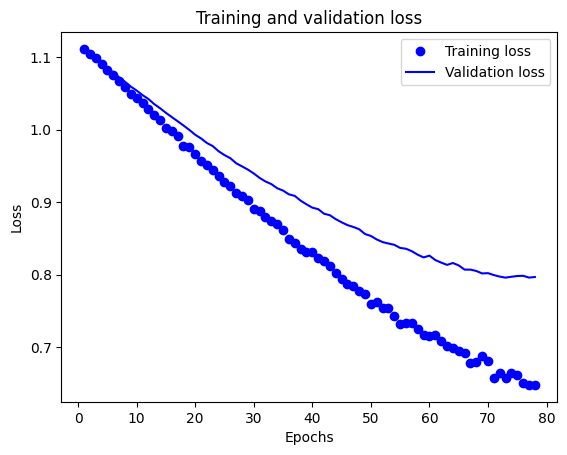

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

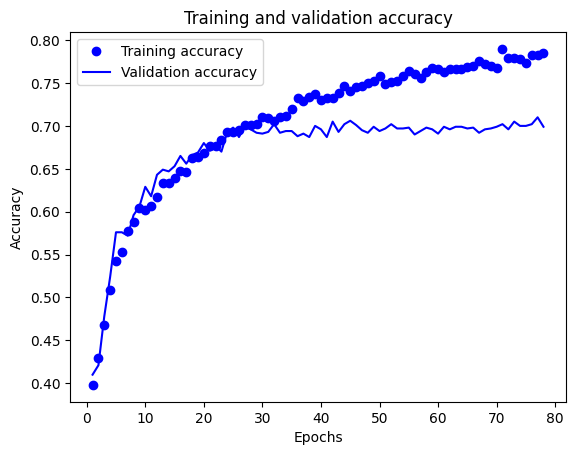

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Se entrena a el modelo final con todos los datos.

In [ ]:
kmodel = keras.Sequential([
  layers.Dense(8, activation="relu", kernel_regularizer = regularizers.l2(l2 = 0.001)),
    layers.Dropout(0.5),
    layers.Dense(4, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(3, activation="softmax")
])
kmodel.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
kmodel.fit(x_train,
          y_train,
          epochs=best_epoch,
          batch_size=512)

Epoch 1/77
17/17 [==============================] - 2s 59ms/step - loss: 1.1101 - accuracy: 0.3479
Epoch 2/77
17/17 [==============================] - 1s 54ms/step - loss: 1.1008 - accuracy: 0.4016
Epoch 3/77
17/17 [==============================] - 1s 53ms/step - loss: 1.0912 - accuracy: 0.4290
Epoch 4/77
17/17 [==============================] - 1s 51ms/step - loss: 1.0819 - accuracy: 0.4706
Epoch 5/77
17/17 [==============================] - 1s 73ms/step - loss: 1.0720 - accuracy: 0.4958
Epoch 6/77
17/17 [==============================] - 1s 78ms/step - loss: 1.0610 - accuracy: 0.5063
Epoch 7/77
17/17 [==============================] - 1s 76ms/step - loss: 1.0525 - accuracy: 0.5221
Epoch 8/77
17/17 [==============================] - 1s 81ms/step - loss: 1.0444 - accuracy: 0.5404
Epoch 9/77
17/17 [==============================] - 1s 78ms/step - loss: 1.0365 - accuracy: 0.5554
Epoch 10/77
17/17 [==============================] - 1s 81ms/step - loss: 1.0259 - accuracy: 0.5777
Epoch 11/

In [ ]:
results = kmodel.evaluate(x_test, y_test)

50/50 [==============================] - 0s 5ms/step - loss: 0.5538 - accuracy: 0.8310
